
## 4. Challenge: apply this to the spotify dataset 😃
Now that you've learned how to use KMeans to create clusters, it's your turn to try it out. Use what you've learned here to cluster the Spotify data. Create some clusters and see what happens. Do you agree with the clusters KMeans has made? Why or why not?

Don't worry about the number of clusters (k) for now. We'll show you how to best estimate the number of clusters in the next code-along.

# Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances
import matplotlib.pyplot as plt


# Import Data

In [2]:
url = '/Users/sadiakhanrupa/Bootcamp Main Phase/Chapter 6 Unsupervised ML/data/6.3.3_spotify_5000_songs.csv'
songs_df = pd.read_csv(url)
songs_df.tail()

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
5230,5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
5231,5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
5232,5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...
5233,5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505,0.1110,0.0591,67.109,,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...
5234,5234,"Ravel: Boléro, M. 81 ...",Maurice Ravel,0.3540,0.04870,5,-24.568,1,0.0323,0.783,0.484,0.2840,0.2530,64.120,,948787,3,7E1ErYYCn0lYjHODZ1qGuB,https://open.spotify.com/track/7E1ErYYCn0lYjHO...


# Clean Data

In [3]:
songs_df.columns

Index(['Unnamed: 0',
       'name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'type ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')

In [4]:
songs_df.columns = songs_df.columns.str.replace(' ', '')


In [5]:
songs_df_cl = songs_df.drop(columns=['Unnamed:0', 'type', 'id', 'html'])
songs_df_cl

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,256213,4
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,191867,4
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,152267,4
3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,186227,4
4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,273680,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3
5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,314307,4


# set index

In [6]:
#we want to set song name and artist as our index
songs_df_cl = songs_df_cl.set_index(['artist', 'name'])
songs_df_cl

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
artist,name,,,,,,,,,,,,,
Gilberto Gil,Se Eu Quiser Falar Com Deus,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,256213,4
Antônio Carlos Jobim,Saudade De Bahia,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,191867,4
Martinho Da Vila,"Canta Canta, Minha Gente",0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,152267,4
Chico César,Mulher Eu Sei,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,186227,4
Kurt Elling,Rosa Morena,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,273680,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pyotr Ilyich Tchaikovsky,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
Tristan Murail,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
Arnold Schoenberg,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3


# Scale the data

In [7]:
scaler = MinMaxScaler().set_output(transform='pandas')
songs_df_cl_mm = scaler.fit_transform(songs_df_cl)


In [8]:
songs_df_cl_mm

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
artist,name,,,,,,,,,,,,,
Gilberto Gil,Se Eu Quiser Falar Com Deus,0.680455,0.25900,1.000000,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,0.059067,0.8
Antônio Carlos Jobim,Saudade De Bahia,0.767322,0.39900,0.181818,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0.042058,0.8
Martinho Da Vila,"Canta Canta, Minha Gente",0.880041,0.73000,0.181818,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.031590,0.8
Chico César,Mulher Eu Sei,0.729059,0.05020,0.363636,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,0.040567,0.8
Kurt Elling,Rosa Morena,0.673216,0.11900,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.063684,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pyotr Ilyich Tchaikovsky,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.208893,0.06940,0.272727,0.596818,1.0,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795,0.254357,0.8
Tristan Murail,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.194416,0.10100,0.545455,0.621548,1.0,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495,0.217350,0.8
Arnold Schoenberg,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.061634,0.00093,0.818182,0.277803,1.0,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469,0.054302,0.6



## 3 Cluster with K-means 🫧
When we cluster with K-means, there is no visible change to the DataFrame. However, when we call the `.fit()` method, Scikit-learn performs all the necessary calculations for the clusters and stores them in the `my_kmeans` variable. We can extract the cluster assignment for each student using the `.labels_` attribute. Below, we add a new column to the DataFrame containing the cluster assignment for each student, which allows us to better understand the results.


In [9]:
myKmeans = KMeans(n_clusters=25, random_state=42)
myKmeans.fit(songs_df_cl_mm)

clusters = myKmeans.labels_
clusters


/Users/sadiakhanrupa/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([22, 14, 21, ...,  6, 10, 10], dtype=int32)

In [10]:
songs_df_cl_mm['cluster'] = clusters
songs_df_cl_mm

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
artist,name,,,,,,,,,,,,,,
Gilberto Gil,Se Eu Quiser Falar Com Deus,0.680455,0.25900,1.000000,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,0.059067,0.8,22
Antônio Carlos Jobim,Saudade De Bahia,0.767322,0.39900,0.181818,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0.042058,0.8,14
Martinho Da Vila,"Canta Canta, Minha Gente",0.880041,0.73000,0.181818,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.031590,0.8,21
Chico César,Mulher Eu Sei,0.729059,0.05020,0.363636,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,0.040567,0.8,3
Kurt Elling,Rosa Morena,0.673216,0.11900,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.063684,0.8,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pyotr Ilyich Tchaikovsky,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.208893,0.06940,0.272727,0.596818,1.0,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795,0.254357,0.8,10
Tristan Murail,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.194416,0.10100,0.545455,0.621548,1.0,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495,0.217350,0.8,6
Arnold Schoenberg,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.061634,0.00093,0.818182,0.277803,1.0,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469,0.054302,0.6,6


In [11]:
songs_df_cl_mm[["cluster"]].sort_values(by='cluster')

cluster
artist                                           name                                                       
Dying Fetus                                      Subjected to a Beating                         ...        0
Tasha Cobbs Leonard                              This Is A Move - Live                          ...        0
Blackthorn                                       Thrones of Death                               ...        0
                                                 Criminal Ecstasy                               ...        0
Napalm Death                                     Dementia Access                                ...        0
...                                                                                                      ...
Culcha Candela                                   Schöne neue Welt - Single Version              ...       24
Frauenarzt                                       Das geht ab - Wir feiern die ganze Nacht - Atze...       24
Yves V                                           Find Your Soul                                 ...       24
Sportfreunde Stiller                             '54, '74, '90, 2010                            ...       24
Oliver Pocher                                    Schwarz und Weiss - Radio Edit                 ...       24

[5235 rows x 1 columns]

####  Cluster analysis - centroids
By looking at the distances between the centroids, we can tell a lot about the clusters that k-means has found.
- If the distances between the centroids are all very small, then the clusters are likely to be very similar and may not be very meaningful.
- If the distances between the centroids are all very large, then the clusters are likely to be very different, but they may also be very spread out and noisy.
- If the distances between the centroids are all roughly the same, then the clusters are likely to be well-separated and meaningful.
- If the distances between the centroids vary widely, then the clusters may overlap or be otherwise intertwined, and they may not be very meaningful.

Let's examine the cluster centroid distances for our food preference data.

<Axes: >

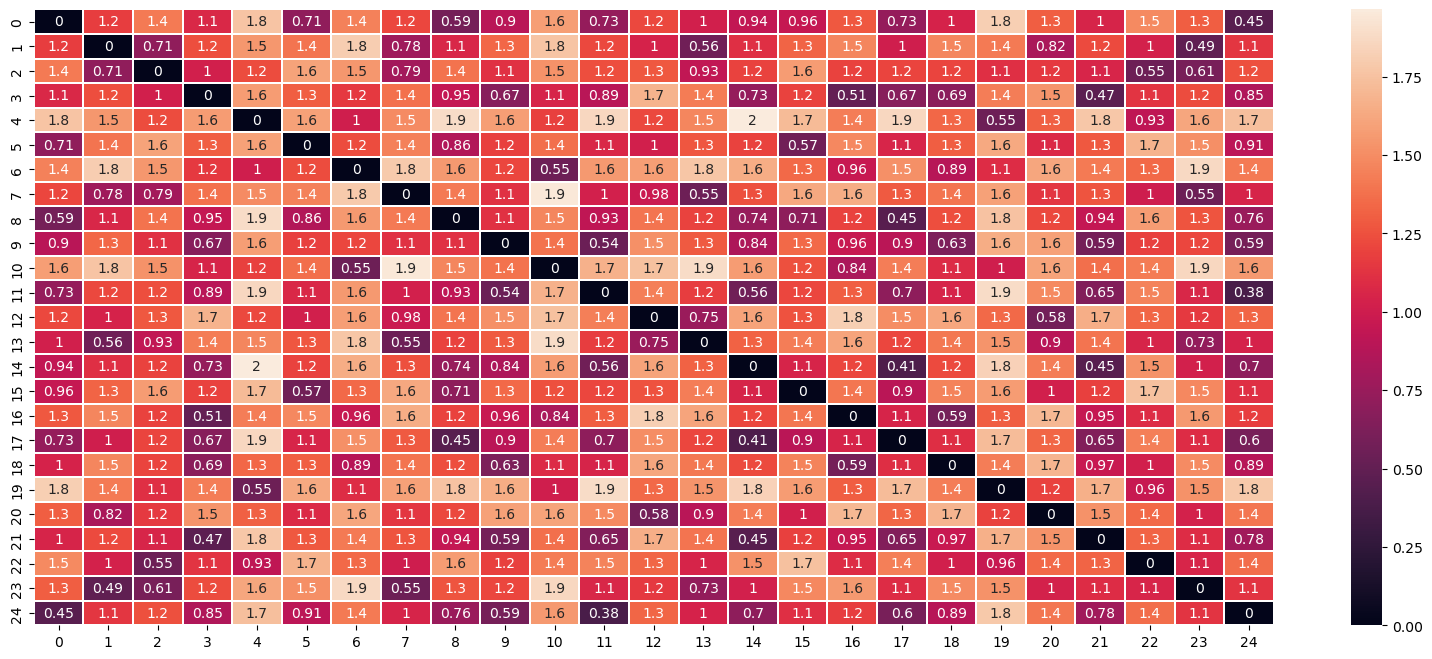

In [12]:
centroids = myKmeans.cluster_centers_

centroid_distances = pairwise_distances(centroids)
fig, ax = plt.subplots(figsize=(20, 8))

sns.heatmap(centroid_distances, 
            annot = True,
            linewidths =.2)

#### 3.1.2 Cluster analysis - column averages
By grouping the clusters and looking at the average score for each column, you can learn more about the different groups of students and their food preferences. For example, you might find that one group of students prefers healthy foods like broccoli and peas, while another group prefers more processed foods like hamburgers. You might also find that some groups of students have a more diverse range of food preferences than others.

In [13]:
songs_df_cl_mm.groupby(by='cluster').mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
cluster,,,,,,,,,,,,,
0,0.325677,0.895952,0.756252,0.868877,1.0,0.123772,0.023877,0.104024,0.219197,0.229875,0.585743,0.061720,0.776419
1,0.546515,0.777585,0.222273,0.882941,0.0,0.084360,0.074168,0.024144,0.228145,0.332790,0.599506,0.052424,0.790000
2,0.644330,0.487050,0.305897,0.816561,0.0,0.090755,0.639674,0.038039,0.189498,0.610756,0.546368,0.053378,0.783784
3,0.595391,0.401688,0.174200,0.803035,1.0,0.055983,0.657804,0.041607,0.178752,0.499356,0.541695,0.049706,0.788827
4,0.333941,0.129609,0.799841,0.614350,0.0,0.048526,0.930406,0.887372,0.129725,0.174666,0.491699,0.078163,0.752632
5,0.294044,0.903790,0.703009,0.848555,1.0,0.109363,0.013056,0.809112,0.212413,0.258281,0.564798,0.059782,0.786477
6,0.348099,0.143366,0.698436,0.633831,1.0,0.050681,0.945810,0.881606,0.131968,0.184018,0.521053,0.066284,0.731183
7,0.744465,0.724177,0.866742,0.875949,0.0,0.105830,0.156045,0.024652,0.180834,0.702339,0.557665,0.051418,0.799379
8,0.293085,0.926175,0.173056,0.864882,1.0,0.128368,0.003027,0.130779,0.187186,0.207738,0.557603,0.059586,0.760241


In [14]:
songs_df_cl_mm.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'cluster'],
      dtype='object')

####  Cluster analysis - radar chart

Having calculated the average score for each food by cluster, we now have a matrix that we can analyse. However, as data scientists with coding skills, we can visualise this information to gain a clearer understanding of why certain people are clustered together and why others aren't.

Visualising the data can help us to identify patterns and trends that would be difficult to see in a matrix. For example, we might be able to see that certain foods are consistently grouped together, while others are more spread out. This could suggest that there are different subgroups of students with different dietary preferences.

We can also use visualisation to identify outliers. For example, we might find a few students who have very different food preferences than the rest of the group. This could be due to a variety of factors, such as cultural background, medical conditions, or personal preferences.

In [15]:
# State the label for each arm of the chart
import plotly.graph_objects as go
categories = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature']


# Create an empty list to store the objects
trace_objects = []

# Iterate over the unique cluster numbers and add an object for each cluster to the list
for cluster in sorted(songs_df_cl_mm['cluster'].unique()):
  cluster_food_means = go.Scatterpolar(
    r=[songs_df_cl_mm.loc[songs_df_cl_mm["cluster"] == cluster, 'danceability'].mean(),
      songs_df_cl_mm.loc[songs_df_cl_mm["cluster"] == cluster, 'energy'].mean(),
      songs_df_cl_mm.loc[songs_df_cl_mm["cluster"] == cluster, 'key'].mean(),
      songs_df_cl_mm.loc[songs_df_cl_mm["cluster"] == cluster, 'loudness'].mean(),
      songs_df_cl_mm.loc[songs_df_cl_mm["cluster"] == cluster, 'mode'].mean(),
      songs_df_cl_mm.loc[songs_df_cl_mm["cluster"] == cluster, 'speechiness'].mean(),
      songs_df_cl_mm.loc[songs_df_cl_mm["cluster"] == cluster, 'acousticness'].mean(),
      songs_df_cl_mm.loc[songs_df_cl_mm["cluster"] == cluster, 'instrumentalness'].mean(),
      songs_df_cl_mm.loc[songs_df_cl_mm["cluster"] == cluster, 'liveness'].mean(),
      songs_df_cl_mm.loc[songs_df_cl_mm["cluster"] == cluster, 'valence'].mean(),
      songs_df_cl_mm.loc[songs_df_cl_mm["cluster"] == cluster, 'tempo'].mean(),
      songs_df_cl_mm.loc[songs_df_cl_mm["cluster"] == cluster, 'duration_ms'].mean(),
      songs_df_cl_mm.loc[songs_df_cl_mm["cluster"] == cluster, 'time_signature'].mean()],
    theta=categories,
    fill='toself',
    name=f'Cluster {cluster}'
  )
  trace_objects.append(cluster_food_means)

# Add the objects to the figure
fig = go.Figure()
fig.add_traces(trace_objects)

# Add extras to the plot such as title
# You'll always need `polar=dict(radialaxis=dict(visible=True,range=[0, 1]))` when creating a radar plot
fig.update_layout(
  title_text = 'Radar chart of mean song palylists by cluster',
  height = 600,
  width = 800,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

# Show the initialised plot and the layers
fig.show()

In [16]:
pd.options.display.max_rows = 999


In [17]:
songs_df_cl_mm = songs_df_cl_mm.reset_index().rename(columns={"name":"song_name"})		


In [18]:
aquistic_Instrumental_songs = songs_df_cl_mm[songs_df_cl_mm['cluster'] == 4]
aquistic_Instrumental_songs.head(200)

,artist,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
33,Cannonball Adderley,O Amor Em Paz ...,0.705274,0.281000,0.818182,0.773744,0.0,0.037146,0.976908,0.897462,0.116515,0.442640,0.551928,0.115347,0.8,4
115,Paulo Moura,Chorinho Pra Voce ...,0.676319,0.400000,0.818182,0.761273,0.0,0.044118,0.787149,0.811168,0.101013,0.862944,0.497458,0.111748,0.8,4
186,Brad Mehldau,Paranoid Android ...,0.398139,0.573000,0.636364,0.765756,0.0,0.048911,0.671687,0.899492,0.094428,0.122843,0.471929,0.135408,0.8,4
213,Fink,Sort Of Revolution ...,0.735264,0.274000,1.000000,0.698217,0.0,0.038671,0.700803,0.506599,0.083384,0.213198,0.677723,0.095465,0.8,4
1042,Fleetwood Mac,Albatross - 2018 Remaster ...,0.331954,0.063100,0.545455,0.625738,0.0,0.038235,0.836345,0.842640,0.142857,0.268020,0.633698,0.041857,0.8,4
1839,Eydís Evensen,Brotin ...,0.380558,0.049500,1.000000,0.563692,0.0,0.041285,0.978916,0.941117,0.097163,0.080711,0.319585,0.042939,0.8,4
1842,Johannes Brahms,"6 Chorale Preludes, BV B 50: Herzlich tut mich...",0.125129,0.004880,0.818182,0.332888,0.0,0.043682,0.998996,0.938071,0.070314,0.188832,0.392640,0.039196,0.8,4
1845,Johann Sebastian Bach,"Prelude in B minor, BWV 855a (Arr. by Alexande...",0.188211,0.037700,1.000000,0.427961,0.0,0.042593,0.990964,0.971574,0.081459,0.093706,0.469564,0.055258,0.8,4
1848,Dirk Maassen,To the Sky (Moderate) ...,0.325750,0.077800,0.818182,0.652848,0.0,0.048257,0.991968,0.907614,0.078521,0.038680,0.283111,0.064508,0.8,4
1849,Tomaso Albinoni,Adagio for Strings and Organ ...,0.164426,0.279000,0.636364,0.757051,0.0,0.040414,0.881526,0.905584,0.105370,0.036041,0.466872,0.060784,1.0,4


In [19]:

# Define a search function
def search_string(s, search):
    return search in str(s).lower()

# Search for the string 'al' in all columns
mask = songs_df_cl_mm.apply(lambda x: x.map(lambda s: search_string(s, 'despacito')))

# Filter the DataFrame based on the mask
filtered_df = pd.DataFrame(songs_df_cl_mm.loc[mask.any(axis=1)])
filtered_df

,artist,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
565,Luis Fonsi,Despacito - Remix ...,0.675284,0.8160,0.181818,0.907160,1.0,0.181917,0.228916,0.000000,0.097974,0.828426,0.832212,0.051828,0.8,14
1945,Beloved Melodies,Despacito ...,0.302999,0.0269,1.000000,0.577076,0.0,0.044662,0.995984,0.954315,0.297872,0.111675,0.764288,0.034295,0.8,4


In [20]:
# State the label for each arm of the chart
import plotly.graph_objects as go
categories = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature']


# Create an empty list to store the objects
trace_objects = []

# Iterate over the unique cluster numbers and add an object for each cluster to the list
for cluster in sorted(songs_df_cl_mm['cluster'].unique()):
  cluster_food_means = go.Scatterpolar(
    r=[songs_df_cl_mm.loc[songs_df_cl_mm["cluster"] == cluster, 'danceability'].mean(),
      songs_df_cl_mm.loc[songs_df_cl_mm["cluster"] == cluster, 'energy'].mean(),
      songs_df_cl_mm.loc[songs_df_cl_mm["cluster"] == cluster, 'key'].mean(),
      songs_df_cl_mm.loc[songs_df_cl_mm["cluster"] == cluster, 'loudness'].mean(),
      songs_df_cl_mm.loc[songs_df_cl_mm["cluster"] == cluster, 'mode'].mean(),
      songs_df_cl_mm.loc[songs_df_cl_mm["cluster"] == cluster, 'speechiness'].mean(),
      songs_df_cl_mm.loc[songs_df_cl_mm["cluster"] == cluster, 'acousticness'].mean(),
      songs_df_cl_mm.loc[songs_df_cl_mm["cluster"] == cluster, 'instrumentalness'].mean(),
      songs_df_cl_mm.loc[songs_df_cl_mm["cluster"] == cluster, 'liveness'].mean(),
      songs_df_cl_mm.loc[songs_df_cl_mm["cluster"] == cluster, 'valence'].mean(),
      songs_df_cl_mm.loc[songs_df_cl_mm["cluster"] == cluster, 'tempo'].mean(),
      songs_df_cl_mm.loc[songs_df_cl_mm["cluster"] == cluster, 'duration_ms'].mean(),
      songs_df_cl_mm.loc[songs_df_cl_mm["cluster"] == cluster, 'time_signature'].mean()],
    theta=categories,
    fill='toself',
    name=f'Cluster {cluster}'
  )
  trace_objects.append(cluster_food_means)

# Add the objects to the figure
fig = go.Figure()
fig.add_traces(trace_objects)

# Add extras to the plot such as title
# You'll always need `polar=dict(radialaxis=dict(visible=True,range=[0, 1]))` when creating a radar plot
fig.update_layout(
  title_text = 'Radar chart of mean song preferances by cluster',
  height = 600,
  width = 800,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

# Show the initialised plot and the layers
fig.show()

In [21]:
#finding our most danceable songs
songs_dance = songs_df_cl_mm[['artist', 'song_name', 'danceability', 'cluster']]
songs_dance.groupby(songs_dance['danceability']).max().sort_values(by = 'danceability', ascending= False)


,artist,song_name,cluster
danceability,,,
1.000000,Justin Timberlake,SexyBack (feat. Timbaland) ...,7
0.996898,Eminem,Shake That ...,23
0.994829,Sugababes,Push The Button ...,11
0.991727,Lützenkirchen,Leider geil (Leider geil) ...,17
0.990693,Tuccillo,Bambola - Radio Version ...,11
0.988625,Nelly,Hot In Herre ...,7
0.987590,Nelly,Hot In Herre ...,7
0.985522,Selena Gomez,Bad Liar ...,14
0.983454,Sean Paul,Temperature ...,23


In [22]:

songs_dance[songs_dance['cluster']==23].agg({'danceability':'mean'})

danceability    0.757261
dtype: float64

In [23]:
songs_dance[songs_dance['cluster']==23].sort_values(by= 'danceability', ascending=False)

,artist,song_name,danceability,cluster
2303,Eminem,Shake That ...,0.996898,23
1614,Sean Paul,Temperature ...,0.983454,23
623,Sean Paul,Temperature ...,0.983454,23
2176,Eminem,The Real Slim Shady ...,0.981386,23
1626,Eminem,The Real Slim Shady ...,0.981386,23
2247,Eminem,The Real Slim Shady ...,0.980352,23
2152,Ice Cube,You Can Do It ...,0.978283,23
1631,Ciara,"One, Two Step (feat. Missy Elliott) ...",0.976215,23
3286,Plan B,Frikitona ...,0.976215,23
2199,Ciara,"One, Two Step (feat. Missy Elliott) ...",0.976215,23


In [24]:
songs_df_cl_mm.head()

,artist,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,Gilberto Gil,Se Eu Quiser Falar Com Deus ...,0.680455,0.2590,1.000000,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,0.059067,0.8,22
1,Antônio Carlos Jobim,Saudade De Bahia ...,0.767322,0.3990,0.181818,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0.042058,0.8,14
2,Martinho Da Vila,"Canta Canta, Minha Gente ...",0.880041,0.7300,0.181818,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.031590,0.8,21
3,Chico César,Mulher Eu Sei ...,0.729059,0.0502,0.363636,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,0.040567,0.8,3
4,Kurt Elling,Rosa Morena ...,0.673216,0.1190,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.063684,0.8,18


In [25]:
songs_df_cl_mm = songs_df_cl_mm.set_index(['artist', 'song_name'])
songs_df_cl_mm

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
artist,song_name,,,,,,,,,,,,,,
Gilberto Gil,Se Eu Quiser Falar Com Deus,0.680455,0.25900,1.000000,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,0.059067,0.8,22
Antônio Carlos Jobim,Saudade De Bahia,0.767322,0.39900,0.181818,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0.042058,0.8,14
Martinho Da Vila,"Canta Canta, Minha Gente",0.880041,0.73000,0.181818,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.031590,0.8,21
Chico César,Mulher Eu Sei,0.729059,0.05020,0.363636,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,0.040567,0.8,3
Kurt Elling,Rosa Morena,0.673216,0.11900,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.063684,0.8,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pyotr Ilyich Tchaikovsky,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.208893,0.06940,0.272727,0.596818,1.0,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795,0.254357,0.8,10
Tristan Murail,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.194416,0.10100,0.545455,0.621548,1.0,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495,0.217350,0.8,6
Arnold Schoenberg,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.061634,0.00093,0.818182,0.277803,1.0,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469,0.054302,0.6,6


In [35]:
songs_df_cl_mm =songs_df_cl_mm.drop('cluster', axis=1)
songs_df_cl_mm

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
artist,song_name,,,,,,,,,,,,,
Gilberto Gil,Se Eu Quiser Falar Com Deus,0.680455,0.25900,1.000000,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,0.059067,0.8
Antônio Carlos Jobim,Saudade De Bahia,0.767322,0.39900,0.181818,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0.042058,0.8
Martinho Da Vila,"Canta Canta, Minha Gente",0.880041,0.73000,0.181818,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.031590,0.8
Chico César,Mulher Eu Sei,0.729059,0.05020,0.363636,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,0.040567,0.8
Kurt Elling,Rosa Morena,0.673216,0.11900,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.063684,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pyotr Ilyich Tchaikovsky,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.208893,0.06940,0.272727,0.596818,1.0,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795,0.254357,0.8
Tristan Murail,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.194416,0.10100,0.545455,0.621548,1.0,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495,0.217350,0.8
Arnold Schoenberg,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.061634,0.00093,0.818182,0.277803,1.0,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469,0.054302,0.6


# Naming The Clusters

In [36]:

from sklearn.metrics import pairwise_distances

# Get the cluster centers
centroids = myKmeans.cluster_centers_
print(centroids.shape)
print(songs_df_cl_mm.shape)
# Calculate the pairwise distances for each song to each cluster centroid
all_distances = pairwise_distances(songs_df_cl_mm, centroids, metric='euclidean')

def summarize_clusters(songs_df_cl_mm, centroids, all_distances):
   
    clusters_summary = pd.DataFrame()

    for cluster_num in range(len(centroids)):
        # Filter songs in the current cluster
        cluster_songs = songs_df_cl_mm[songs_df_cl_mm['cluster'] == cluster_num]
        
        # Calculate distances for the current cluster's songs
        indices = [songs_df_cl_mm.index.get_loc(idx) for idx in cluster_songs.index]
        cluster_distances = all_distances[indices, cluster_num]
        cluster_songs = cluster_songs.copy()  # Make a copy to avoid SettingWithCopyWarning
        cluster_songs['distance_to_centroid'] = cluster_distances
        
        # Calculate mean of the specified features for the cluster
        means = cluster_songs[['danceability', 'valence', 'acousticness', 'energy', 'instrumentalness']].mean()
        
        # Find the closest and farthest songs
        closest_song = cluster_songs.nsmallest(1, 'distance_to_centroid')
        farthest_song = cluster_songs.nlargest(1, 'distance_to_centroid')
        # Prepare the summary for this cluster
        summary_data = {
            'Cluster': cluster_num,
            'Mean Danceability': means['danceability'],
            'Mean Valence': means['valence'],
            'Mean Acousticness': means['acousticness'],
            'Mean Energy': means['energy'],
            'Mean Instrumentalness': means['instrumentalness'],
            'Closest Song Name': closest_song.index.get_level_values('name')[0],
            'Closest Song Artist': closest_song.index.get_level_values('artist')[0],
            'Closest Song Distance': closest_song['distance_to_centroid'].iloc[0],
            'Farthest Song Name': farthest_song.index.get_level_values('name')[0],
            'Farthest Song Artist': farthest_song.index.get_level_values('artist')[0],
            'Farthest Song Distance': farthest_song['distance_to_centroid'].iloc[0]
        }
        
        # Append the summary data to the clusters_summary DataFrame
        clusters_summary = pd.concat([clusters_summary, pd.DataFrame([summary_data])], ignore_index=True)

    return clusters_summary

clusters_summary = summarize_clusters(songs_df_cl_mm, centroids, all_distances)
clusters_summary

(25, 13)
(5235, 13)


KeyError: 'cluster'